Random Forest

Dataset Description:

Use the Glass dataset and apply the Random forest model.

1.Exploratory Data Analysis (EDA):

Perform exploratory data analysis to understand the structure of the dataset. Check for missing values, outliers, inconsistencies in the data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
file = 'glass.xlsx'

In [4]:
df = pd.read_excel(file, sheet_name = 'glass')

In [5]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
df.info()     #total non null values are equal for all

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [8]:
df.dtypes    #all data types are correct

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [9]:
df.isna().sum()    #no missing values

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(1)

In [11]:
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [12]:
df[df.duplicated(keep=False)]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df[df.duplicated()]    #duplicate rows are droped

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


In [15]:
#RI	Na	Mg	Al	Si	K	Ca	Ba	Fe	Type

In [16]:
df['Ba'].value_counts()

Ba
0.00    175
0.09      2
0.11      2
1.59      2
0.64      2
1.57      2
0.27      1
0.06      1
0.14      1
0.69      1
2.20      1
0.15      1
0.24      1
1.19      1
1.68      1
1.63      1
0.76      1
3.15      1
0.40      1
0.61      1
0.81      1
0.66      1
0.53      1
0.63      1
0.56      1
1.71      1
0.67      1
1.55      1
1.38      1
2.88      1
0.54      1
1.06      1
1.64      1
1.67      1
Name: count, dtype: int64

In [17]:
df['Fe'].value_counts()

Fe
0.00    143
0.24      7
0.17      7
0.09      6
0.10      5
0.11      4
0.14      3
0.07      3
0.22      3
0.16      3
0.28      3
0.12      3
0.15      2
0.08      2
0.19      2
0.26      1
0.03      1
0.31      1
0.06      1
0.30      1
0.20      1
0.32      1
0.34      1
0.29      1
0.21      1
0.18      1
0.25      1
0.35      1
0.37      1
0.51      1
0.05      1
0.01      1
Name: count, dtype: int64

In [18]:
df['Type'].value_counts()

Type
2    76
1    69
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [19]:
#outliers detection

In [20]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


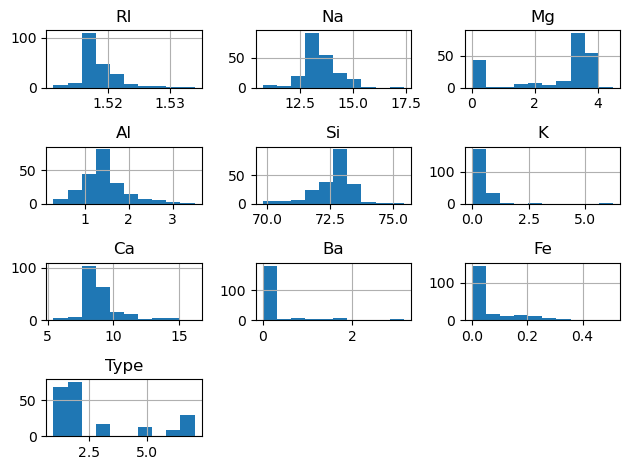

In [21]:
df.hist()
plt.tight_layout()

<Axes: >

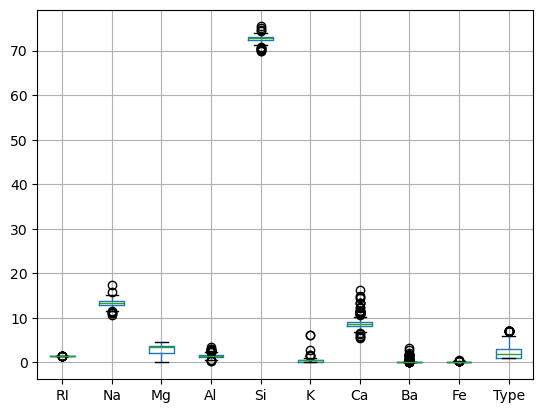

In [22]:
df.boxplot()    #outliers:- RI, Na,	Mg,	Al,	Si,	K,	Ca,	Ba,	Fe,	Type

2: Data Visualization:

Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features. Analyze any patterns or correlations observed in the data.

<Axes: ylabel='Frequency'>

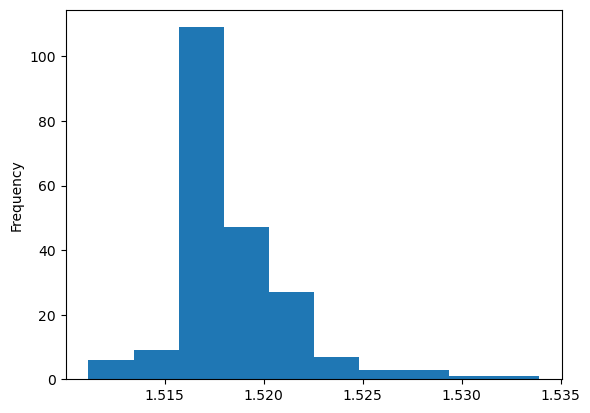

In [23]:
df['RI'].plot(kind='hist')

<Axes: >

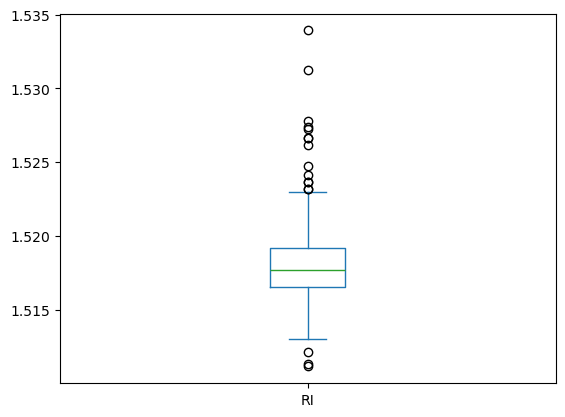

In [24]:
df['RI'].plot(kind='box')     # outliers are present , so have to treat 

<Axes: ylabel='Frequency'>

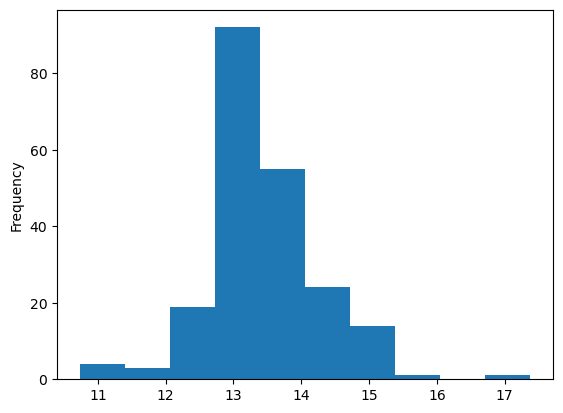

In [25]:
df['Na'].plot(kind='hist')

<Axes: >

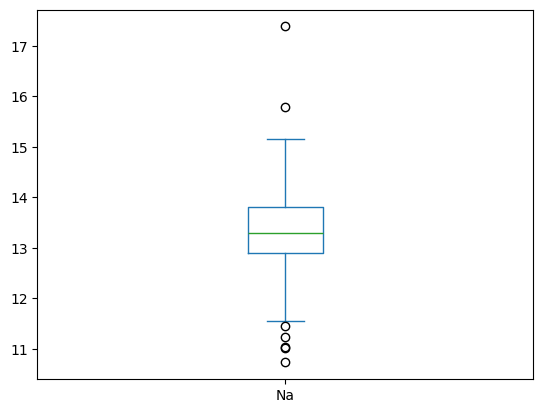

In [26]:
df['Na'].plot(kind='box')       # outliers are present , so have to treat

<Axes: ylabel='Frequency'>

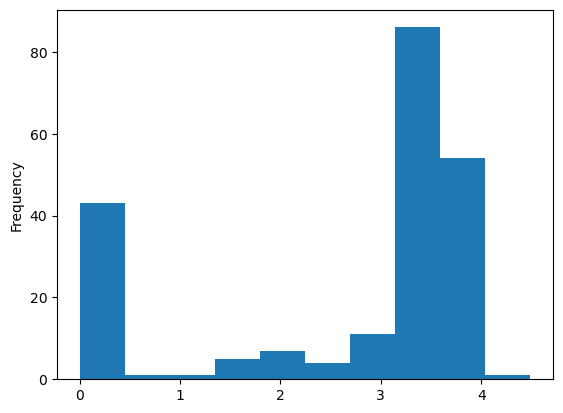

In [27]:
df['Mg'].plot(kind='hist')

<Axes: >

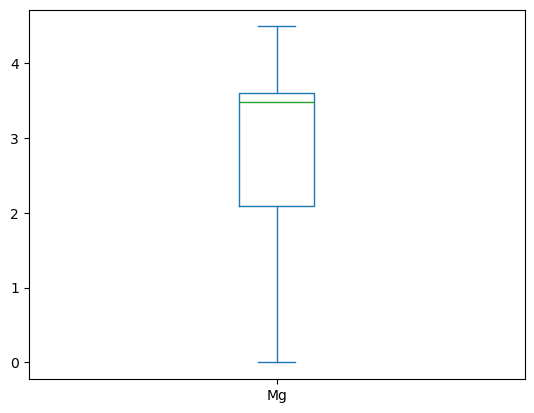

In [28]:
df['Mg'].plot(kind='box')       # no outliers

<Axes: ylabel='Frequency'>

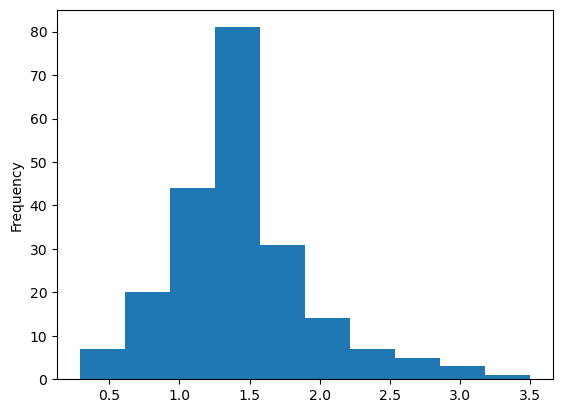

In [29]:
df['Al'].plot(kind='hist')

<Axes: >

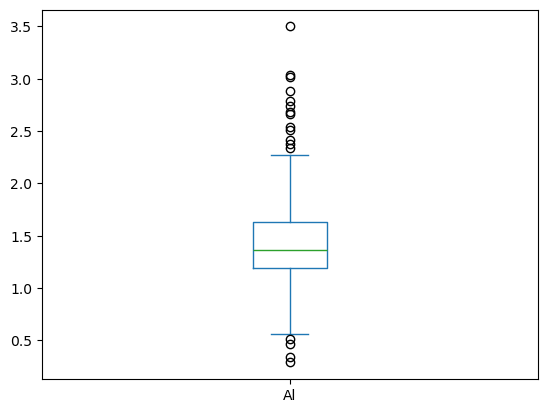

In [30]:
df['Al'].plot(kind='box')     # outliers are present in this column , so have to treat it

<Axes: ylabel='Frequency'>

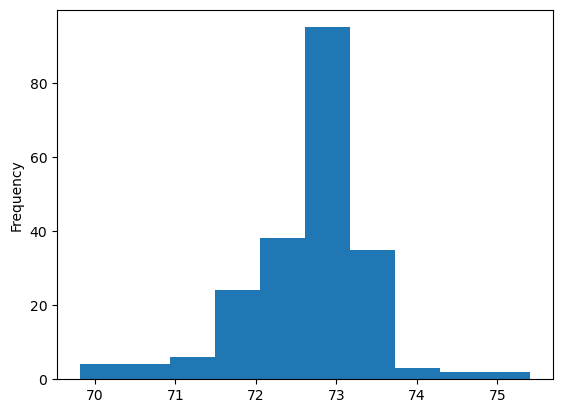

In [31]:
df['Si'].plot(kind='hist')

<Axes: >

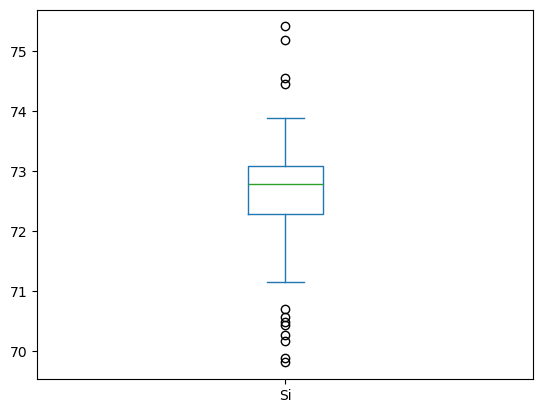

In [32]:
df['Si'].plot(kind='box')  # outliers are preseent 

<Axes: ylabel='Frequency'>

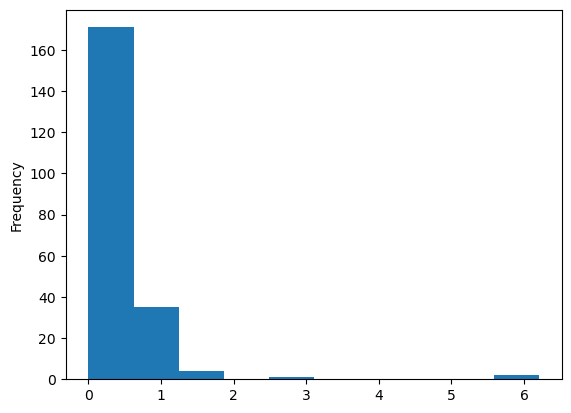

In [33]:
df['K'].plot(kind='hist')

<Axes: >

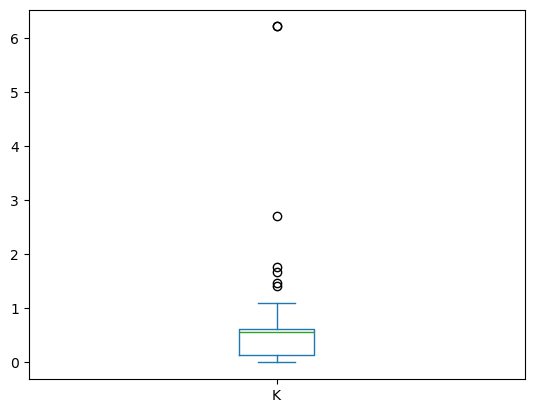

In [34]:
df['K'].plot(kind='box')   # outliers present have to treat it 

<Axes: ylabel='Frequency'>

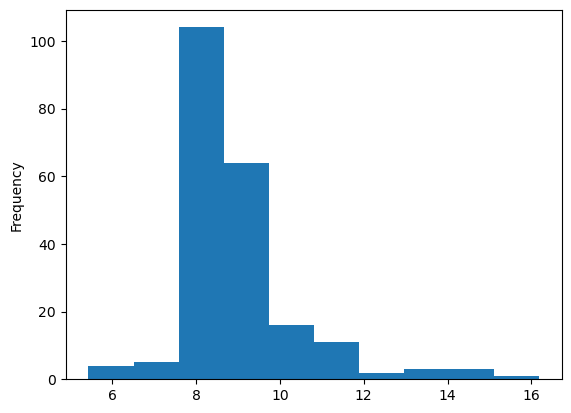

In [35]:
df['Ca'].plot(kind='hist')

<Axes: >

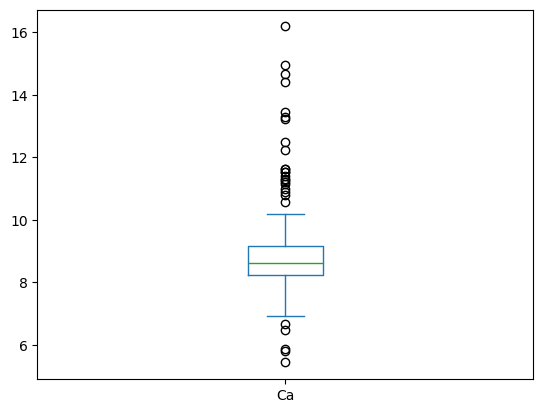

In [36]:
df['Ca'].plot(kind='box')

<Axes: ylabel='Frequency'>

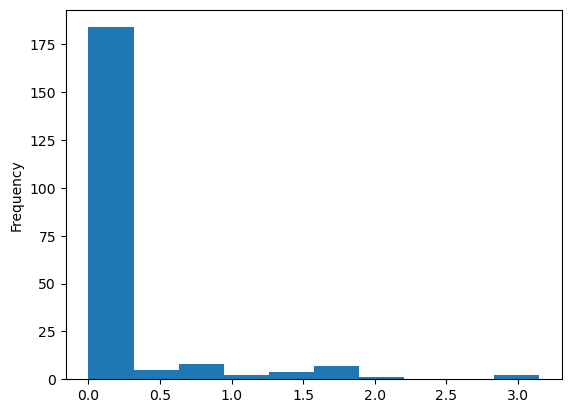

In [37]:
df['Ba'].plot(kind='hist')

<Axes: >

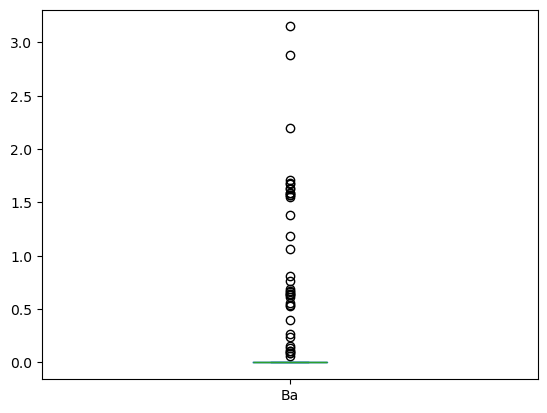

In [38]:
df['Ba'].plot(kind='box')        # outliers are present on the upper side of the boxplot

<Axes: ylabel='Frequency'>

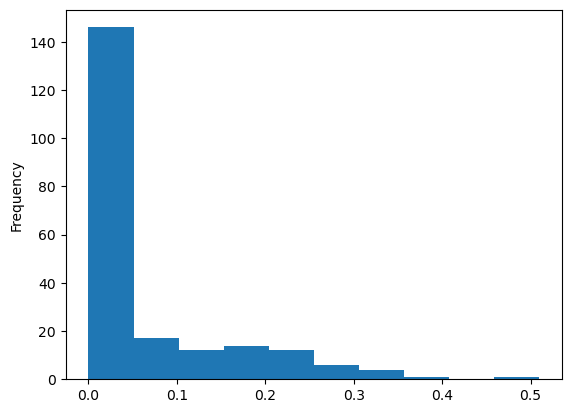

In [39]:
df['Fe'].plot(kind='hist')

<Axes: >

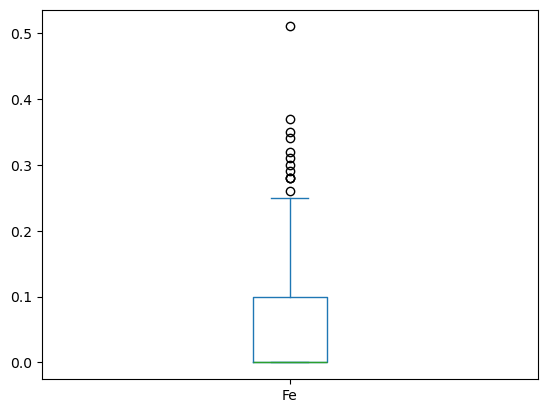

In [40]:
df['Fe'].plot(kind='box')

<Axes: ylabel='Frequency'>

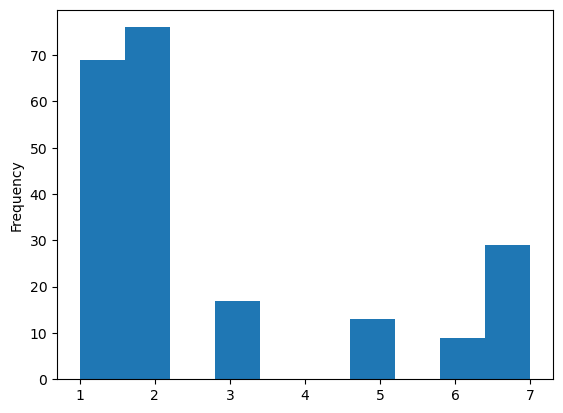

In [41]:
df['Type'].plot(kind='hist')

<Axes: >

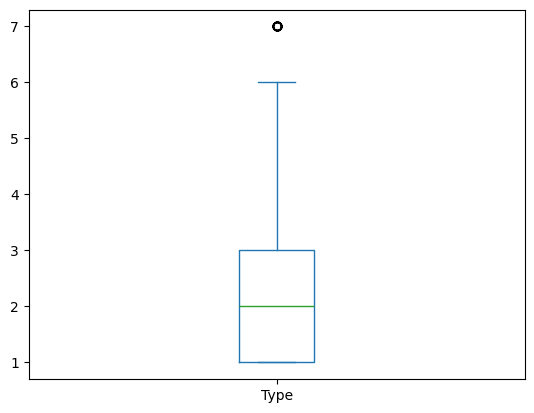

In [42]:
df['Type'].plot(kind='box')   #one outlier is present on the upper side of boxplot

array([[<Axes: xlabel='RI', ylabel='RI'>,
        <Axes: xlabel='Na', ylabel='RI'>,
        <Axes: xlabel='Mg', ylabel='RI'>,
        <Axes: xlabel='Al', ylabel='RI'>,
        <Axes: xlabel='Si', ylabel='RI'>,
        <Axes: xlabel='K', ylabel='RI'>,
        <Axes: xlabel='Ca', ylabel='RI'>,
        <Axes: xlabel='Ba', ylabel='RI'>,
        <Axes: xlabel='Fe', ylabel='RI'>,
        <Axes: xlabel='Type', ylabel='RI'>],
       [<Axes: xlabel='RI', ylabel='Na'>,
        <Axes: xlabel='Na', ylabel='Na'>,
        <Axes: xlabel='Mg', ylabel='Na'>,
        <Axes: xlabel='Al', ylabel='Na'>,
        <Axes: xlabel='Si', ylabel='Na'>,
        <Axes: xlabel='K', ylabel='Na'>,
        <Axes: xlabel='Ca', ylabel='Na'>,
        <Axes: xlabel='Ba', ylabel='Na'>,
        <Axes: xlabel='Fe', ylabel='Na'>,
        <Axes: xlabel='Type', ylabel='Na'>],
       [<Axes: xlabel='RI', ylabel='Mg'>,
        <Axes: xlabel='Na', ylabel='Mg'>,
        <Axes: xlabel='Mg', ylabel='Mg'>,
        <Axes: xlabel='Al', yl

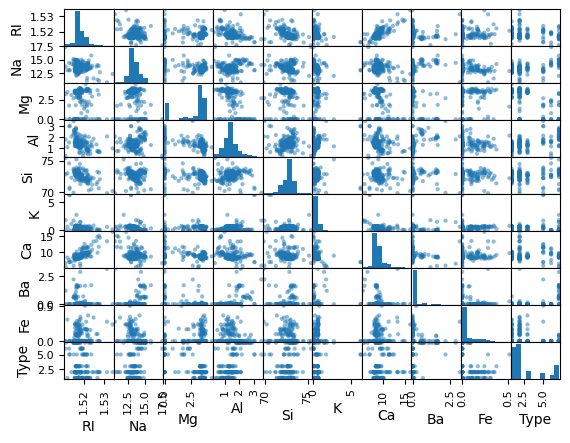

In [43]:
pd.plotting.scatter_matrix(df)

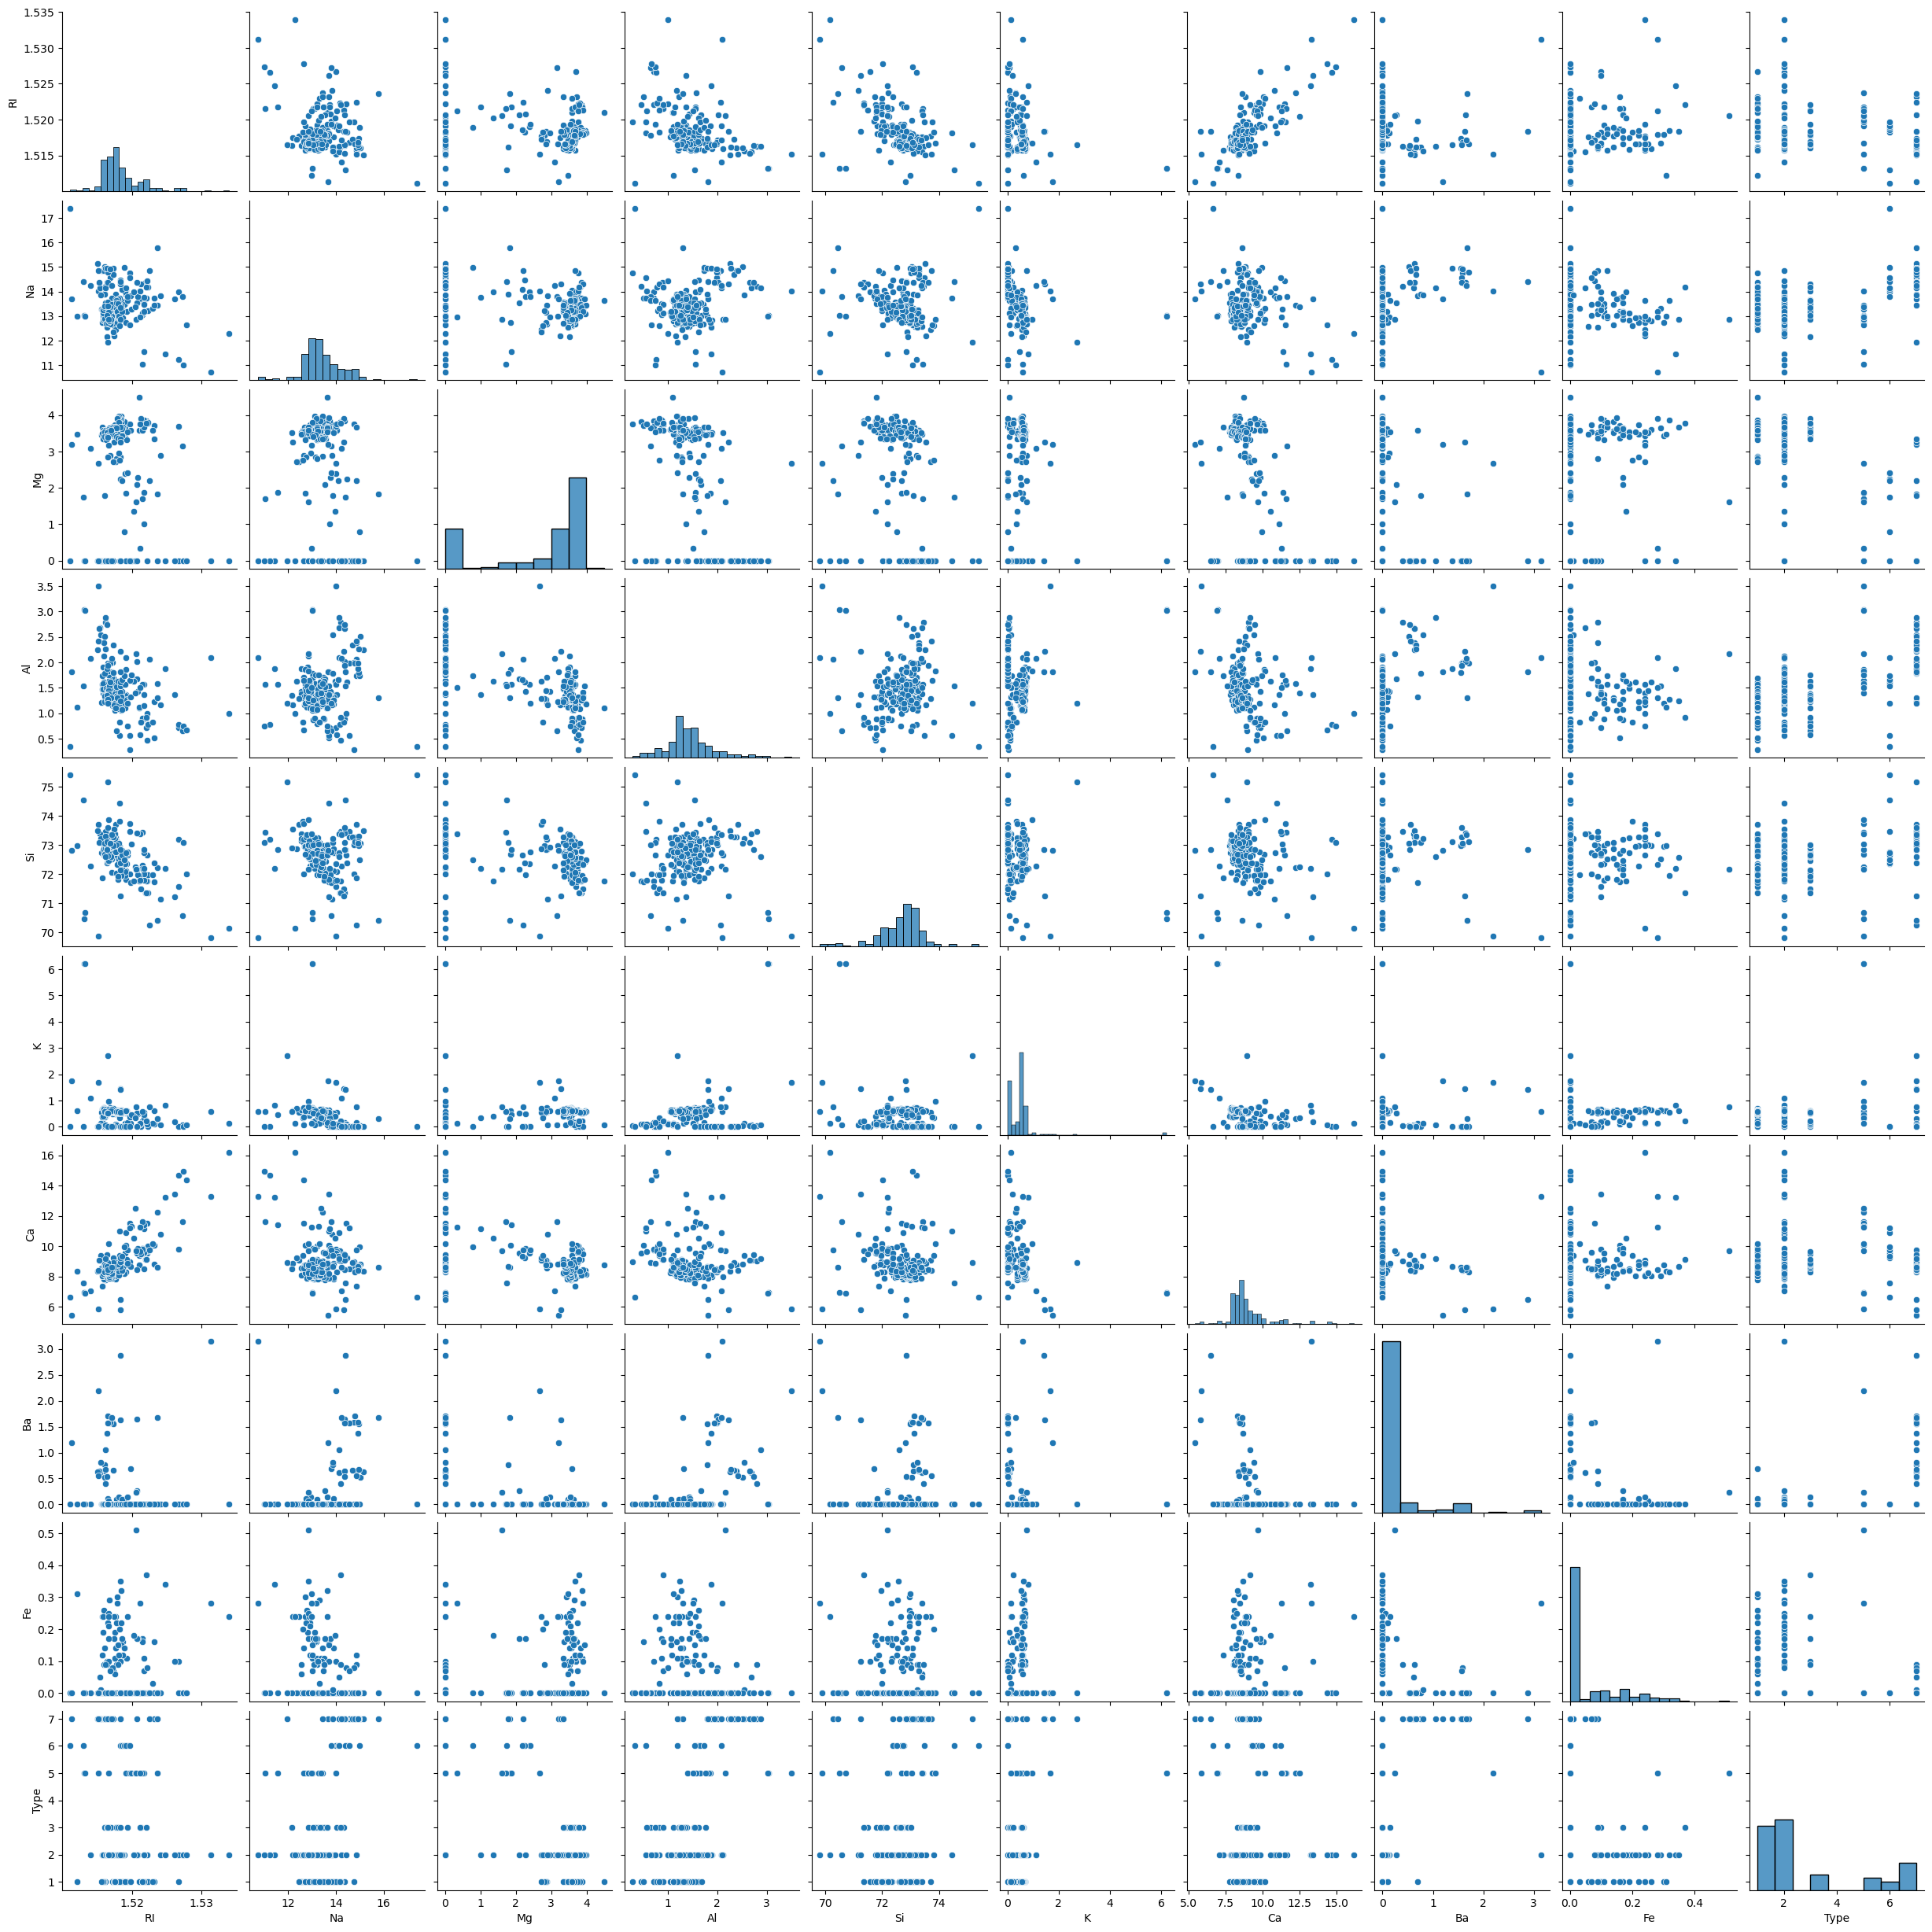

In [44]:
sns.pairplot(df)

In [45]:
# from pairplot , we can getto know the linear relationship btwn features likes:- RI and Ca ,
# negative realtionship :- na and si , si and RI , Al and Ri

In [46]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


<Axes: >

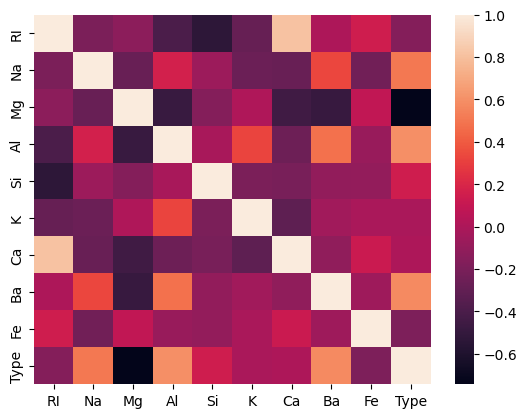

In [47]:
sns.heatmap(df.corr())

<Axes: >

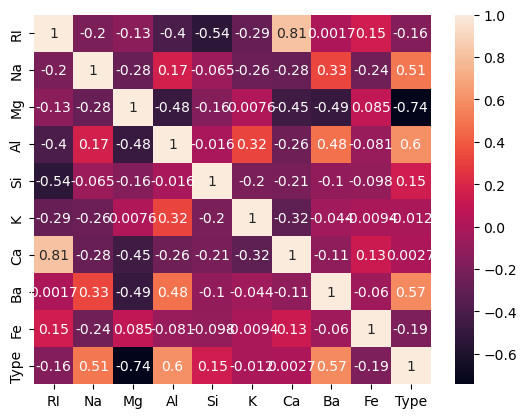

In [48]:
sns.heatmap(df.corr(),annot=True)

3: Data Preprocessing

1.Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.

2.If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.

3.Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

In [49]:
sc = StandardScaler()

In [50]:
scaled_df = pd.DataFrame(sc.fit_transform(df),columns = df.columns)


In [51]:
scaled_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301,-0.851703
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301,-0.851703
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301,-0.851703
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301,-0.851703
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301,-0.851703
...,...,...,...,...,...,...,...,...,...,...
208,-0.699888,0.903249,-1.860172,2.891336,-0.058368,-0.642789,0.158812,1.778672,-0.588301,2.005192
209,-0.494986,1.860605,-1.860172,1.092483,0.524398,-0.765554,-0.389506,2.844912,-0.588301,2.005192
210,0.760865,1.173272,-1.860172,1.153118,0.990612,-0.765554,-0.361387,2.945501,-0.588301,2.005192
211,-0.607351,1.197820,-1.860172,0.991424,1.236668,-0.765554,-0.333268,2.804676,-0.588301,2.005192


4: Random Forest Model Implementation

1.Divide the data into train and test split.

2.Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.

3.Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

In [52]:
array=scaled_df.values
X = array[:,0:8]
Y = array[:,8]

In [53]:
X.dtype

dtype('float64')

In [54]:
Y.dtype

dtype('float64')

In [55]:
X

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.67348013,
        -0.14346582, -0.35380764],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.02896224,
        -0.79020061, -0.35380764],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.16707322,
        -0.82534924, -0.35380764],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.76555411,
        -0.36138732,  2.94550057],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.76555411,
        -0.33326842,  2.80467644],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.76555411,
        -0.23485225,  3.00585377]])

In [56]:
Y

array([-0.58830108, -0.58830108, -0.58830108, -0.58830108, -0.58830108,
        2.08220006, -0.58830108, -0.58830108, -0.58830108,  0.54152632,
        1.8767769 , -0.58830108,  1.8767769 ,  1.15779582, -0.58830108,
       -0.58830108, -0.58830108, -0.58830108, -0.58830108,  0.13067999,
        1.36321898, -0.58830108, -0.58830108, -0.58830108, -0.58830108,
       -0.58830108, -0.58830108, -0.58830108, -0.58830108, -0.58830108,
        0.84966107, -0.58830108,  1.67135373,  0.02796841, -0.58830108,
       -0.58830108, -0.58830108, -0.58830108, -0.58830108, -0.58830108,
       -0.58830108, -0.58830108, -0.58830108,  2.49304639, -0.58830108,
        1.05508424,  0.43881474, -0.58830108, -0.58830108,  1.05508424,
        0.54152632, -0.58830108, -0.58830108,  0.33610316,  1.8767769 ,
        2.59575797, -0.58830108, -0.58830108,  0.54152632, -0.58830108,
       -0.58830108,  0.54152632, -0.58830108,  0.13067999, -0.58830108,
        1.15779582,  1.15779582,  1.05508424, -0.28016634,  0.64

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [58]:
X_train

array([[-0.16780361, -0.88872739,  0.68791178, ...,  0.17053139,
        -0.17861445, -0.35380764],
       [-0.09509647, -0.49596555,  0.77817087, ...,  0.09380307,
        -0.40356568, -0.35380764],
       [-0.4222786 ,  0.09317721,  0.55599466, ...,  0.18587706,
        -0.67772499, -0.35380764],
       ...,
       [-0.53464418, -0.12775132,  0.66708276, ...,  0.23191405,
        -0.64960609, -0.35380764],
       [ 1.28303431, -0.23821559,  0.75734185, ..., -0.56606048,
         0.74930938, -0.35380764],
       [ 0.68815771, -0.02956086, -1.86017161, ..., -0.2591472 ,
         2.49268143, -0.35380764]])

In [60]:
X_test

array([[-3.56181197e-01,  1.59058173e+00, -1.86017161e+00,
         1.79989724e+00,  8.09306440e-01, -7.65554112e-01,
        -2.87129653e-03,  9.73962736e-01],
       [-1.24840299e-01, -8.15084541e-01,  5.55994659e-01,
        -2.01074560e-01,  3.94894848e-01,  2.16568385e-01,
        -1.92673898e-01, -3.53807643e-01],
       [ 2.05739793e-02, -5.81882198e-01,  7.36512828e-01,
        -6.86158634e-01, -4.85729783e-01,  2.16568385e-01,
         4.15842946e-03, -3.53807643e-01],
       [ 4.43597335e-01, -9.37822616e-01, -1.86017161e+00,
         4.05280532e-01,  1.41797346e+00, -1.82418879e-01,
         1.81079801e+00, -3.53807643e-01],
       [ 9.65766791e-01,  1.12417705e+00,  8.47600933e-01,
        -1.25209005e+00, -1.49585804e+00, -7.65554112e-01,
         3.76733907e-01, -3.53807643e-01],
       [-6.27180535e-01,  4.40819847e-02,  6.46253744e-01,
         1.82950331e-01, -3.43275799e-01,  2.47259713e-01,
        -6.49606087e-01, -3.53807643e-01],
       [-3.03303278e-01, -1.477870

In [61]:
Y_train

array([-0.58830108,  0.64423791, -0.58830108, -0.58830108, -0.58830108,
        1.05508424, -0.58830108, -0.58830108, -0.58830108, -0.58830108,
       -0.58830108, -0.58830108, -0.58830108,  1.15779582, -0.58830108,
        0.54152632, -0.58830108, -0.58830108, -0.58830108, -0.58830108,
       -0.58830108,  1.15779582, -0.58830108,  0.33610316, -0.58830108,
        0.84966107, -0.58830108, -0.58830108, -0.58830108, -0.58830108,
        0.13067999,  1.8767769 ,  2.90389272,  1.8767769 , -0.58830108,
       -0.58830108, -0.58830108, -0.58830108, -0.58830108,  0.23339158,
       -0.58830108, -0.58830108,  1.46593057,  0.64423791, -0.58830108,
       -0.58830108, -0.58830108, -0.58830108,  1.36321898,  0.43881474,
       -0.58830108, -0.58830108, -0.58830108, -0.58830108, -0.58830108,
       -0.58830108, -0.58830108,  0.43881474, -0.58830108,  2.49304639,
        1.8767769 , -0.58830108, -0.58830108, -0.58830108, -0.58830108,
       -0.58830108, -0.58830108, -0.58830108, -0.58830108, -0.58

In [62]:
Y_test

array([-0.58830108, -0.58830108,  1.67135373, -0.58830108, -0.58830108,
       -0.58830108,  1.8767769 , -0.58830108,  2.08220006, -0.58830108,
        2.59575797,  3.0066043 , -0.58830108,  0.84966107, -0.58830108,
       -0.58830108,  1.15779582,  1.8767769 , -0.58830108, -0.58830108,
       -0.58830108, -0.58830108, -0.58830108, -0.58830108,  1.8767769 ,
       -0.58830108,  4.64998962, -0.58830108,  0.43881474, -0.58830108,
       -0.58830108,  0.13067999,  1.97948848, -0.58830108, -0.58830108,
        3.21202747,  0.02796841, -0.58830108, -0.58830108,  0.33610316,
        1.8767769 , -0.58830108, -0.58830108])

In [63]:
num_trees = 100
max_features = 5 #Total features m=8, K=3 i.e. randomly select 3 features
kfold = KFold(n_splits=10)

In [64]:
model = RandomForestClassifier(n_estimators=10, max_features=max_features, random_state=2) # try random_state=2, n_estimators=10 by default, default=gini

In [65]:
model

RandomForestClassifier(max_features=5, n_estimators=10, random_state=2)

In [66]:
# Fit the model
model.fit(X_train, Y_train)    # as , for floating X and Y , we were using classifier instead of regression , so thats why it is giving error

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [67]:
results = cross_val_score(model, X, Y, cv=kfold)    # so we will use decision tree regressor  as for model building

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 419, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
                               ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 831, in _validate_y_class_weight
    check_classification_targets(y)
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\multiclass.py", line 222, in check_classification_targets
    raise ValueError(
    ...<3 lines>...
    )
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score ,precision_score, recall_score, f1_score

In [69]:
model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
model.fit(X_train, Y_train)


RandomForestRegressor(random_state=42)

In [70]:
Y_pred = model.predict(X_test)


In [71]:
Y_pred

array([-0.28838326,  0.61034308,  0.46962822,  0.85376954,  0.1183546 ,
        0.09473094,  0.20668657, -0.08706856,  0.29912699, -0.31714251,
        0.3319947 ,  0.15738501, -0.33049501, -0.20724111, -0.24627151,
       -0.18361745, -0.28222057,  0.12040884, -0.39417619, -0.25448844,
        0.03413111, -0.25756979, -0.31816962, -0.1415057 , -0.06652624,
       -0.41882697,  0.90615244,  0.01769725, -0.15793955, -0.10144818,
        0.61239732, -0.04290258,  0.4295707 , -0.13123454,  0.22928311,
       -0.35206444, -0.0634449 , -0.05933643,  0.18511713, -0.41677274,
        0.28782872, -0.03057719,  0.11321903])

In [72]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

In [73]:
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 1.7235033547104066
R-squared (R2): 0.06719591115146117


In [74]:
X = df.iloc[:,0:8]

In [75]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00
...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57


In [76]:
feature_importance = model.feature_importances_
for i, col in enumerate(X.columns):
    print(f"Feature Importance for {col}: {feature_importance[i]:.4f}")

Feature Importance for RI: 0.1214
Feature Importance for Na: 0.2065
Feature Importance for Mg: 0.1372
Feature Importance for Al: 0.1279
Feature Importance for Si: 0.1448
Feature Importance for K: 0.1124
Feature Importance for Ca: 0.0965
Feature Importance for Ba: 0.0533


In [77]:
threshold = 0.50  # Example threshold
Y_test_class = (Y_test >= threshold).astype(float)  # True target classes: 1 if >= 50, else 0
Y_pred_class = (Y_pred >= threshold).astype(float)  # Predicted classes: 1 if >= 50, else 0


In [78]:
Y_test_class

array([0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0.])

In [79]:
Y_pred_class

array([0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [80]:
precision = precision_score(Y_test_class, Y_pred_class)
recall = recall_score(Y_test_class, Y_pred_class)
f1 = f1_score(Y_test_class, Y_pred_class)


In [81]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.25
Recall: 0.07692307692307693
F1 Score: 0.11764705882352941


5: Bagging and Boosting Methods Apply the Bagging and Boosting methods and compare the results.

In [82]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [83]:
bagging_model = BaggingRegressor(
    n_estimators=10,  # Number of base estimators
    random_state=42
)

In [84]:
bagging_model.fit(X_train, Y_train)

BaggingRegressor(random_state=42)

In [85]:
Y_pred = bagging_model.predict(X_test)

In [86]:
Y_pred

array([-0.41369139,  0.17176463,  0.29501853,  0.2025781 ,  0.60315327,
        0.0074261 ,  0.36691663, -0.34179328,  0.05878189, -0.39314908,
        0.80857644, -0.19799707, -0.02338738, -0.47531834, -0.03365854,
       -0.16718359, -0.38287792,  0.325832  , -0.30070865, -0.40342023,
        0.08959536, -0.25962402, -0.38287792, -0.05420085,  0.42854358,
       -0.44450487,  0.93183034, -0.01311622, -0.29043749, -0.1158278 ,
        0.31556084, -0.33152213,  0.56206864,  0.05878189, -0.22881054,
       -0.30070865,  0.2025781 ,  0.18203579,  0.01769725, -0.57802992,
        0.02796841, -0.1158278 , -0.08501433])

In [87]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)


In [88]:
print("Bagging Regressor Results:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Bagging Regressor Results:
Mean Squared Error (MSE): 1.671310485698459
R-squared (R2): 0.09544402653227602


In [89]:
from sklearn.ensemble import GradientBoostingRegressor

In [90]:
boosting_model = GradientBoostingRegressor(
    n_estimators=100,  # Number of boosting stages
    learning_rate=0.1,  # Step size shrinkage
    max_depth=3,       # Max depth of individual estimators
    random_state=42
)

In [91]:
boosting_model.fit(X_train, Y_train)

GradientBoostingRegressor(random_state=42)

In [92]:
Y_pred_boosting = boosting_model.predict(X_test)


In [93]:
Y_pred_boosting

array([-0.43075642,  0.18285063,  0.31092461,  0.24604289, -0.12840274,
       -0.38787115,  0.13351453, -0.1178551 ,  0.03301101, -0.73610395,
        0.28730605,  0.01147121, -0.0977505 , -0.37427987, -0.45781228,
       -0.04266661, -0.23040434, -0.23396571, -0.42635285,  0.55483741,
       -0.0141404 , -0.34679652, -0.34033817, -0.28809587, -0.13397801,
       -0.19112548,  1.37241118, -0.06165033, -0.28650139, -0.37862784,
        0.56197641, -0.4205574 ,  1.01799655, -0.15686708,  0.00397487,
       -0.43600406, -0.14102393, -0.23950983, -0.17546039, -0.54828029,
        0.36088112,  0.38001737, -0.20519875])

In [94]:
mse_boosting = mean_squared_error(Y_test, Y_pred_boosting)
r2_boosting = r2_score(Y_test, Y_pred_boosting)

In [95]:
print("\nGradient Boosting Regressor Results:")
print("Mean Squared Error (MSE):", mse_boosting)
print("R-squared (R2):", r2_boosting)


Gradient Boosting Regressor Results:
Mean Squared Error (MSE): 1.6786036579682164
R-squared (R2): 0.0914967751995105


Additional Notes:

1.Explain Bagging and Boosting methods. How is it different from each other.

Both bagging and boosting are ensemble methods in machine learning, but they are fundamentally different in how they combine models to improve performance. Here's a detailed comparison:

1.Bagging (Bootstrap Aggregating) Objective: Reduce variance and prevent overfitting.

How it works:

Random subsets (with replacement) of the training data are created, forming "bootstrap samples." A base model (e.g., decision tree, regression model) is trained independently on each subset. Final prediction: Regression: Average of all base model predictions. Classification: Majority voting. 

Key Features:

Models are built in parallel, making it computationally efficient. Reduces overfitting by averaging the results across multiple models. Works well when individual models have high variance (e.g., decision trees). Example Algorithm: Random Forest (uses bagging with decision trees).

2.Boosting Objective: Reduce bias by focusing on learning from mistakes of previous models.

How it works:

Models are trained sequentially, with each model learning from the errors of its predecessor. Misclassified or poorly predicted instances are assigned higher weights, forcing the next model to focus more on these difficult cases. Final prediction: Weighted average of all base model predictions.
Key Features:

Combines weak learners to form a strong learner. Works well for complex datasets with high bias. Risk of overfitting if not regularized properly. Example Algorithms: AdaBoost, Gradient Boosting, XGBoost, LightGBM, CatBoost.

2. Explain how to handle imbalance in the data.

Imbalanced data occurs when one class significantly outnumbers another, which can lead to biased predictions. Here's how to handle it:

1. Data-Level Techniques
   
Resampling:

Oversampling: Increase the minority class samples (e.g., using SMOTE - Synthetic Minority Oversampling Technique).

Undersampling: Reduce the majority class samples.

Class Weights:
Assign higher weights to the minority class in the loss function (many ML algorithms, like RandomForestClassifier, support the class_weight parameter).

2. Algorithm-Level Techniques
   
Use algorithms designed for imbalanced datasets:

XGBoost and LightGBM allow customized objective functions for handling imbalance.

Ensemble methods like Balanced Random Forest or EasyEnsemble.

3. Evaluation Metrics
   
Avoid accuracy as it can be misleading for imbalanced data.

Use:

Precision: Proportion of correctly predicted positive observations.

Recall: Proportion of actual positives that were identified correctly.

F1-Score: Harmonic mean of precision and recall.

AUC-ROC: Performance across all classification thresholds.

4. Techniques for Specific Problems
   
Imbalanced Binary Classification:

Use class_weight='balanced' in models like SVM, Logistic Regression, or Random Forest.

Imbalanced Multi-Class Classification:

One-vs-all (OVA) approach combined with resampling or class weights.


eg :- 'Target': [0]*90 + [1]*10  # Imbalanced target